<a href="https://colab.research.google.com/github/Mahammed400/Goruntu-isleme/blob/main/ML_VIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


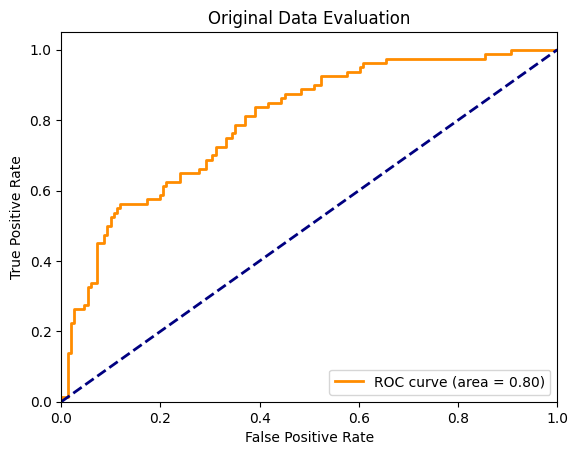

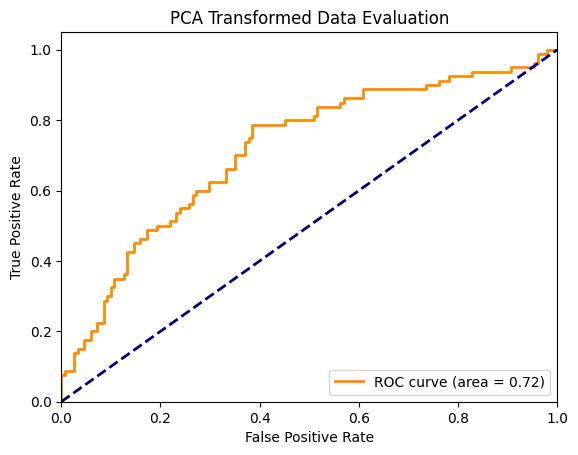

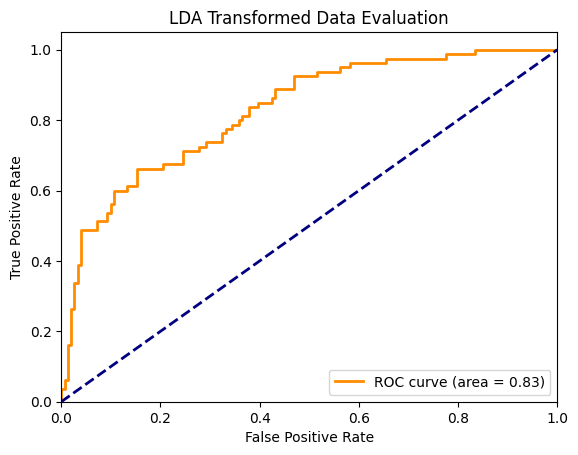


LDA Öznitelikleri:
[[ 1.59568511]
 [ 5.37028404]
 [-1.29678594]
 [ 0.06973034]
 [-0.69619845]
 [ 4.05084079]
 [ 1.57183732]
 [ 0.71694521]]

LDA uygulanmış veri seti için model değerlendirme(  Test):
Accuracy: 0.7748917748917749
F1 Score:               precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.68      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Sensitivity: 0.892
Specificity: 0.49537037037037046
Confusion Matrix:
 [[126  25]
 [ 27  53]]

LDA uygulanmış veri seti için model değerlendirme ( Train):
Accuracy: 0.7838541666666666
F1 Score: 0.582089552238806
Confusion Matrix:
 [[446  54]
 [112 156]]

PCA Açıklanan Varyans Oranları:
[0.31192249 0.21186663]
PCA Öznitelikleri:
[[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-

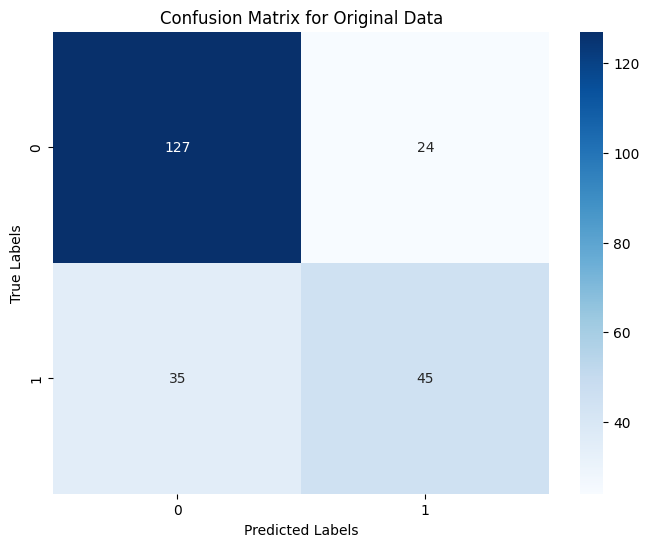

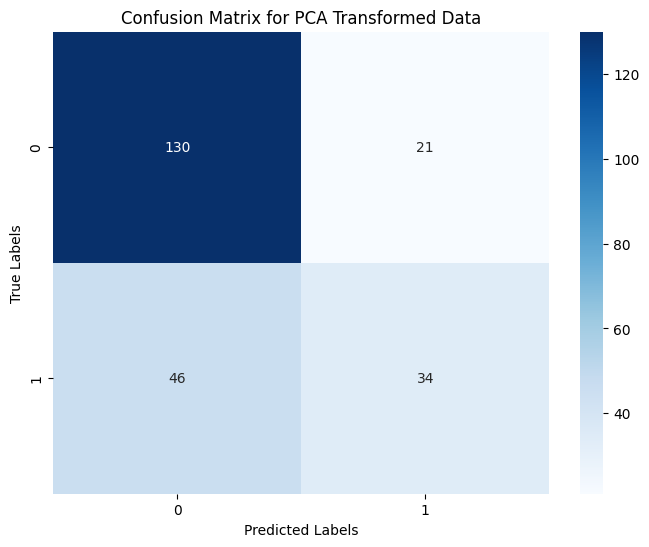

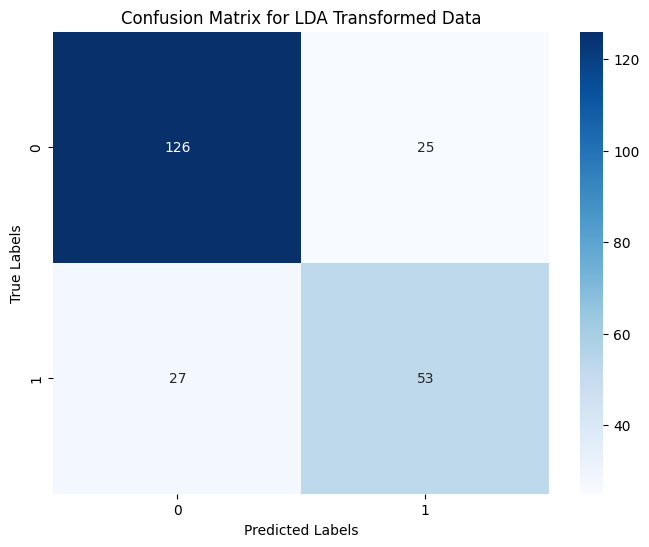

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Veri setini yükleme ve formatlama
file_path = "veri-seti.txt"  # Veri setinizin yolu
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  # Sütun isimleri
data = pd.read_csv(file_path, header=None, delimiter='\t', names=columns)

data.info()

# Min-Max normalizasyonu uygulama
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])

# PCA uygulama
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# LDA uygulama
lda = LDA(n_components=1)
data_lda = lda.fit_transform(data_scaled, data['Outcome'])



# Performans değerlendirme fonksiyonu
def evaluate_model(X, y, title='Model Evaluation'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    classification_rep = classification_report(y_test, y_pred)

    # Performans metrikleri
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # ROC Eğrisi
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return cm, accuracy, f1,classification_rep,

# Metrik hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return cm, accuracy, f1, sensitivity, specificity,classification_rep,

# Ana veri seti için model değerlendirme
cm_original, accuracy_original,classification_rep, f1_original = evaluate_model(data_scaled, data['Outcome'], title='Original Data Evaluation')
y_pred_original = LogisticRegression().fit(data_scaled, data['Outcome']).predict(data_scaled)
cm_original_metrics, accuracy_original_metrics,classification_rep, f1_original_metrics, sensitivity_original, specificity_original = calculate_metrics(data['Outcome'], y_pred_original)

# PCA uygulanmış veri seti için model değerlendirme
cm_pca, accuracy_pca,classification_rep, f1_pca = evaluate_model(data_pca, data['Outcome'], title='PCA Transformed Data Evaluation')
y_pred_pca = LogisticRegression().fit(data_pca, data['Outcome']).predict(data_pca)
cm_pca_metrics, accuracy_pca_metrics,classification_rep, f1_pca_metrics, sensitivity_pca, specificity_pca = calculate_metrics(data['Outcome'], y_pred_pca)

# LDA uygulanmış veri seti için model değerlendirme
cm_lda, accuracy_lda,classification_rep_lda, f1_lda = evaluate_model(data_lda, data['Outcome'], title='LDA Transformed Data Evaluation')
y_pred_lda = LogisticRegression().fit(data_lda, data['Outcome']).predict(data_lda)
cm_lda_metrics, accuracy_lda_metrics,classification_rep_lda, f1_lda_metrics, sensitivity_lda, specificity_lda = calculate_metrics(data['Outcome'], y_pred_lda)

# LDA bileşenlerini yazdırma
print("\nLDA Öznitelikleri:")
print(lda.scalings_)

# Sonuçları yazdırma
print("\nLDA uygulanmış veri seti için model değerlendirme(  Test):")
print("Accuracy:", accuracy_lda)
print("F1 Score:", f1_lda)
print("Sensitivity:", sensitivity_lda)
print("Specificity:", specificity_lda)
print("Confusion Matrix:\n", cm_lda)

print("\nLDA uygulanmış veri seti için model değerlendirme ( Train):")
print("Accuracy:", accuracy_lda_metrics)
print("F1 Score:", f1_lda_metrics)
print("Confusion Matrix:\n", cm_lda_metrics)

# PCA bileşenleri ve açıklanan varyans oranlarını yazdırma
print("\nPCA Açıklanan Varyans Oranları:")
print(pca.explained_variance_ratio_)

# PCA sonuçlarını yazdırma
print("PCA Öznitelikleri:")
print(pca.components_)

# Sonuçları yazdırma
print("Ana Veri Seti için Model Değerlendirmesi( Test):")
print("Accuracy:", accuracy_original)
print("F1 Score:", f1_original)
print("Sensitivity:", sensitivity_original)
print("Specificity:", specificity_original)
print("Confusion Matrix:\n", cm_original)

print("\nAna Veri Seti için Model Değerlendirmesi (Train):")
print("Accuracy:", accuracy_original_metrics)
print("F1 Score:", f1_original_metrics)
print("Confusion Matrix:\n", cm_original_metrics)

print("\nPCA Uygulanmış Veri Seti için Model Değerlendirmesi ( Test):")
print("Accuracy:", accuracy_pca)
print("F1 Score:", f1_pca)
print("Sensitivity:", sensitivity_pca)
print("Specificity:", specificity_pca)
print("Confusion Matrix:\n", cm_pca)

print("\nPCA Uygulanmış Veri Seti için Model Değerlendirmesi (Train):")
print("Accuracy:", accuracy_pca_metrics)
print("F1 Score:", f1_pca_metrics)
print("Confusion Matrix:\n", cm_pca_metrics)

import seaborn as sns

#Confusion Matrix Çizimi Fonksiyonu
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Ana veri seti için büyük confusion matrix çizimi
plot_confusion_matrix(cm_original, title='Confusion Matrix for Original Data')

# PCA uygulanmış veri seti için büyük confusion matrix çizimi
plot_confusion_matrix(cm_pca, title='Confusion Matrix for PCA Transformed Data')

# LDA uygulanmış veri seti için büyük confusion matrix çizimi
plot_confusion_matrix(cm_lda, title='Confusion Matrix for LDA Transformed Data')



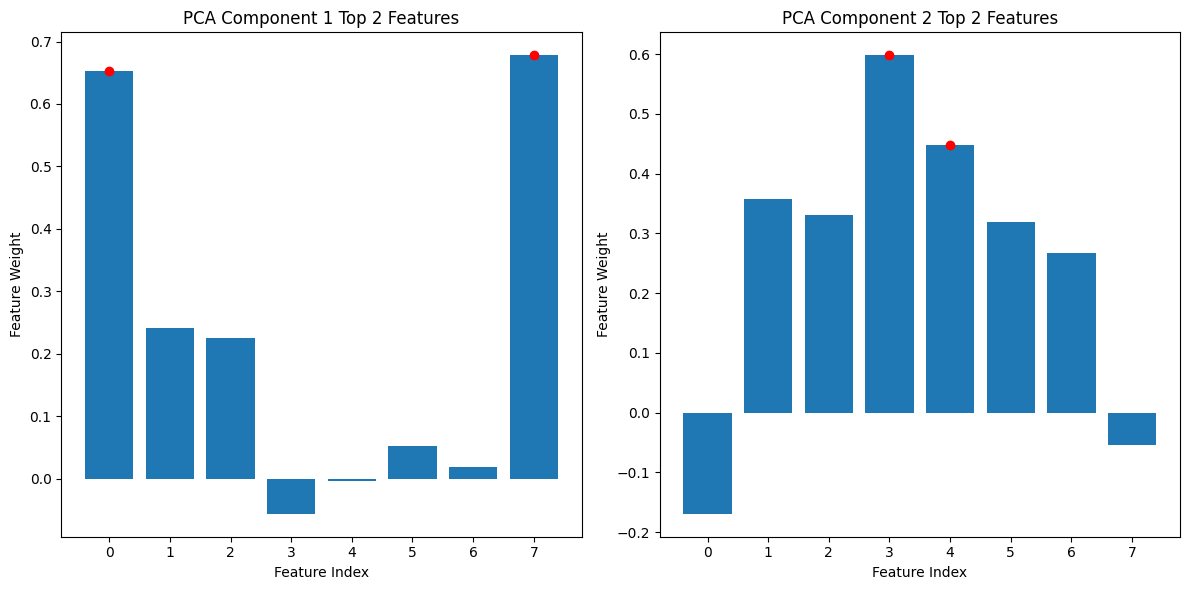

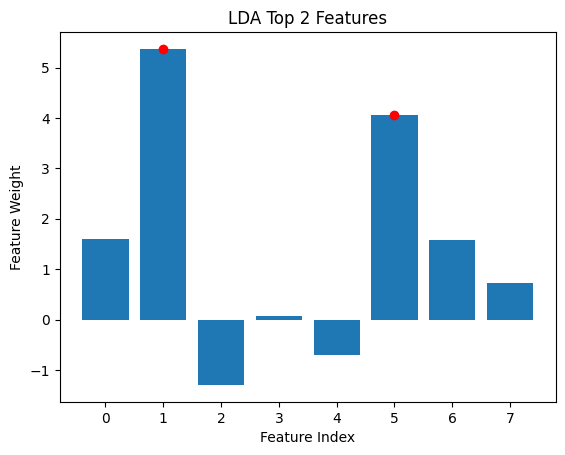

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# PCA için en yüksek iki ağırlığa sahip özniteliklerin indekslerini bulalım.
pca_component_1 = pca.components_[0]
pca_component_2 = pca.components_[1]

# Her bileşen için en yüksek iki ağırlığa sahip özniteliklerin indekslerini alalım
pca_top2_features_component_1 = (-np.abs(pca_component_1)).argsort()[:2]
pca_top2_features_component_2 = (-np.abs(pca_component_2)).argsort()[:2]

# LDA için ağırlıkların indekslerini bulalım.
# Not: LDA sadece bir bileşen üretir, bu yüzden sadece bir set indeksimiz olacak.
lda_scalings = lda.scalings_.flatten()
lda_top2_features = (-np.abs(lda_scalings)).argsort()[:2]

# Orijinal veri setindeki ilgili öznitelikleri çizdirelim
plt.figure(figsize=(12, 6))

# PCA bileşeni 1 için en iyi iki öznitelik
plt.subplot(1, 2, 1)
plt.bar(range(len(pca_component_1)), pca_component_1)
plt.title('PCA Component 1 Top 2 Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.scatter(pca_top2_features_component_1, pca_component_1[pca_top2_features_component_1], color='red')  # En iyi iki özelliği vurgula

# PCA bileşeni 2 için en iyi iki öznitelik
plt.subplot(1, 2, 2)
plt.bar(range(len(pca_component_2)), pca_component_2)
plt.title('PCA Component 2 Top 2 Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.scatter(pca_top2_features_component_2, pca_component_2[pca_top2_features_component_2], color='red')  # En iyi iki özelliği vurgula

plt.tight_layout()
plt.show()

# LDA için en iyi iki özniteliği çizdirelim
plt.figure()
plt.bar(range(len(lda_scalings)), lda_scalings)
plt.title('LDA Top 2 Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.scatter(lda_top2_features, lda_scalings[lda_top2_features], color='red')  # En iyi iki özelliği vurgula
plt.show()


Çoklu Doğrusal Regresyon Katsayıları:
Pregnancies: 0.15289704076804997
Glucose: 1.1425801182684943
BloodPressure: -0.2087596528190313
SkinThickness: -0.025067626306106955
Insulin: -0.10701828233224575
BMI: 1.0852400781213942
DiabetesPedigreeFunction: 0.170735748093915
Age: 0.37587028892018726

Regresyon Denklemi:
Y = (0.15289704076804997 * Pregnancies) + (1.1425801182684943 * Glucose) + (-0.2087596528190313 * BloodPressure) + (-0.025067626306106955 * SkinThickness) + (-0.10701828233224575 * Insulin) + (1.0852400781213942 * BMI) + (0.170735748093915 * DiabetesPedigreeFunction) + (0.37587028892018726 * Age) + -0.8641437698838159

Çoklu Doğrusal Regresyon Performans Metrikleri:
Accuracy: 0.7316017316017316
Sensitivity: 0.6
Specificity: 0.8013245033112583
F1 Score: 0.6075949367088608
ROC AUC: 0.7006622516556291
MSE: 0.17603335005142037
R2 Skoru: 0.2224076496611056
[[121  30]
 [ 32  48]]

Çoklu Doğrusal Regresyon Classification Report:
              precision    recall  f1-score   support



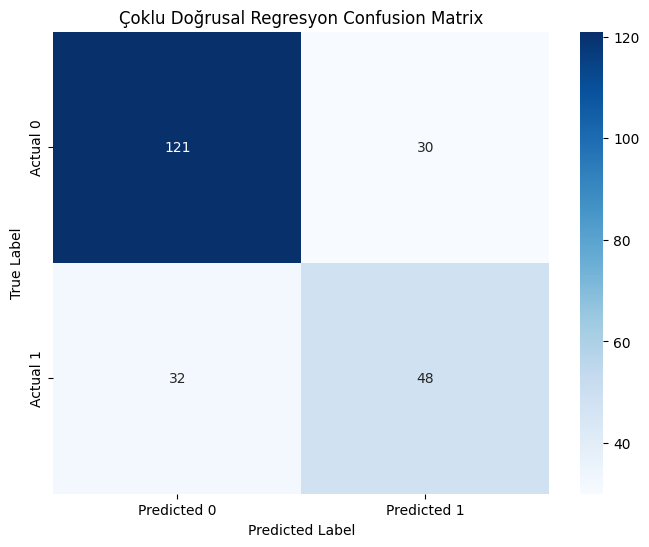


Multinominal Lojistik Regresyon Katsayıları:
Pregnancies: 0.4505206000650255
Glucose: 2.6511893078290667
BloodPressure: -0.24999553416814002
SkinThickness: 0.030390250280018606
Insulin: -0.06304148596958414
BMI: 2.165994721511499
DiabetesPedigreeFunction: 0.4539922450776253
Age: 0.9063861367178426

Multinominal Lojistik Regresyon Performans Metrikleri:
Accuracy: 0.7359307359307359
Sensitivity: 0.575
Specificity: 0.8211920529801324
F1 Score: 0.6013071895424835
ROC AUC: 0.6980960264900662
[[124  27]
 [ 34  46]]

Multinominal Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       151
           1       0.63      0.57      0.60        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix:


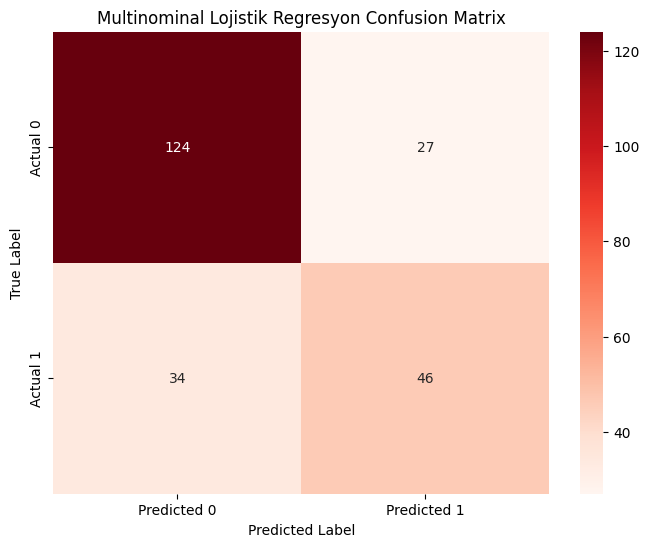

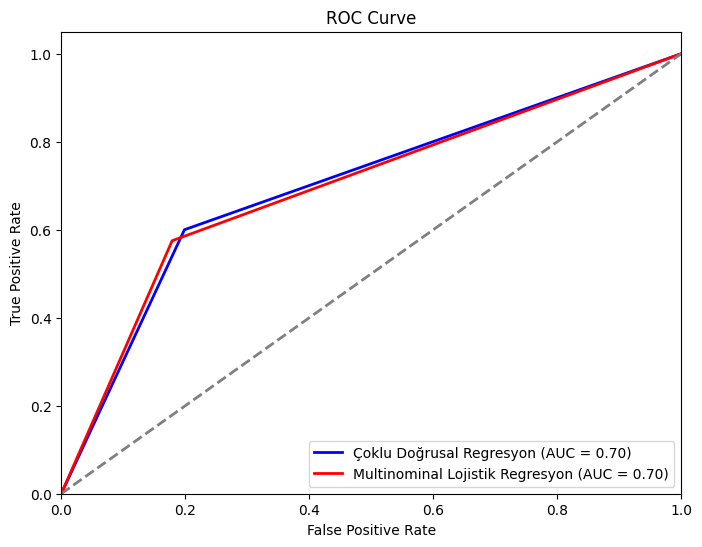

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report
# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Outcome'], test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon Analizi
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon Katsayıları:")
for idx, col_name in enumerate(data_scaled.columns):
    print(f"{col_name}: {linear_model.coef_[idx]}")

# F1-score hesaplama
f1_linear = f1_score(y_test, np.round(y_pred_linear))

# ROC curve ve AUC hesaplama
fpr_linear, tpr_linear, _ = roc_curve(y_test, np.round(y_pred_linear))
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Çoklu Doğrusal Regresyon için confusion matrix bileşenleri
tn_linear, fp_linear, fn_linear, tp_linear = confusion_matrix(y_test, np.round(y_pred_linear)).ravel()

# Çoklu Doğrusal Regresyon için confusion matrix bileşenleri
cm_linear = confusion_matrix(y_test, np.round(y_pred_linear))
tn_linear, fp_linear, fn_linear, tp_linear = cm_linear.ravel()


# Çoklu Doğrusal Regresyon için sensitivity, specificity ve accuracy
sensitivity_linear = tp_linear / (tp_linear + fn_linear)
specificity_linear = tn_linear / (tn_linear + fp_linear)
accuracy_linear = (tp_linear + tn_linear) / (tp_linear + tn_linear + fp_linear + fn_linear)


# Multinominal Lojistik Regresyon Analizi
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# F1-score hesaplama
f1_logistic = f1_score(y_test, y_pred_logistic)

# ROC curve ve AUC hesaplama
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Multinominal Lojistik Regresyon için confusion matrix bileşenleri
tn_logistic, fp_logistic, fn_logistic, tp_logistic = confusion_matrix(y_test, y_pred_logistic).ravel()

# Multinominal Lojistik Regresyon için confusion matrix bileşenleri
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
tn_logistic, fp_logistic, fn_logistic, tp_logistic = cm_logistic.ravel()

# Multinominal Lojistik Regresyon için sensitivity, specificity ve accuracy
sensitivity_logistic = tp_logistic / (tp_logistic + fn_logistic)
specificity_logistic = tn_logistic / (tn_logistic + fp_logistic)
accuracy_logistic = (tp_logistic + tn_logistic) / (tp_logistic + tn_logistic + fp_logistic + fn_logistic)


# Regresyon denklemi
equation = "Y = "
for i, coef in enumerate(linear_model.coef_):
    equation += f"({coef} * {data_scaled.columns[i]}) + "
equation += str(linear_model.intercept_)
print("\nRegresyon Denklemi:")
print(equation)

# Performans Metriklerini Hesaplama
# Çoklu Doğrusal Regresyon için
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Multinominal Lojistik Regresyon için
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Performans metriklerini yazdırma
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("Accuracy:", accuracy_linear)
print("Sensitivity:", sensitivity_linear)
print("Specificity:", specificity_linear)
print("F1 Score:", f1_linear)
print("ROC AUC:", roc_auc_linear)
print(f"MSE: {mse_linear}")
print(f"R2 Skoru: {r2_linear}")
print(confusion_matrix(y_test, np.round(y_pred_linear)))

# Çoklu Doğrusal Regresyon için classification report
print("\nÇoklu Doğrusal Regresyon Classification Report:")
print(classification_report(y_test, np.round(y_pred_linear)))

print("Confusion Matrix:")
cm_linear_df = pd.DataFrame(cm_linear, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear_df, annot=True, cmap='Blues', fmt='g')
plt.title('Çoklu Doğrusal Regresyon Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Katsayıları raporlama
print("\nMultinominal Lojistik Regresyon Katsayıları:")
for idx, col_name in enumerate(data_scaled.columns):
    print(f"{col_name}: {logistic_model.coef_[0][idx]}")

print("\nMultinominal Lojistik Regresyon Performans Metrikleri:")
print("Accuracy:", accuracy_logistic)
print("Sensitivity:", sensitivity_logistic)
print("Specificity:", specificity_logistic)
print("F1 Score:", f1_logistic)
print("ROC AUC:", roc_auc_logistic)
print(confusion_matrix(y_test, y_pred_logistic))

# Multinominal Lojistik Regresyon için classification report
print("\nMultinominal Lojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Confusion Matrix:")
cm_logistic_df = pd.DataFrame(cm_logistic, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic_df, annot=True, cmap='Reds', fmt='g')
plt.title('Multinominal Lojistik Regresyon Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ROC Curve çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label='Çoklu Doğrusal Regresyon (AUC = %0.2f)' % roc_auc_linear)
plt.plot(fpr_logistic, tpr_logistic, color='red', lw=2, label='Multinominal Lojistik Regresyon (AUC = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Karar Ağacı Sınıflandırma Performans Metrikleri:
Doğruluk Skoru: 0.696969696969697
Sensitivity: 0.625
Specificity: 0.7350993377483444
F1 Score: 0.5882352941176471
ROC AUC: 0.6800496688741722
Confusion Matrix:
[[111  40]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       151
           1       0.56      0.62      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231



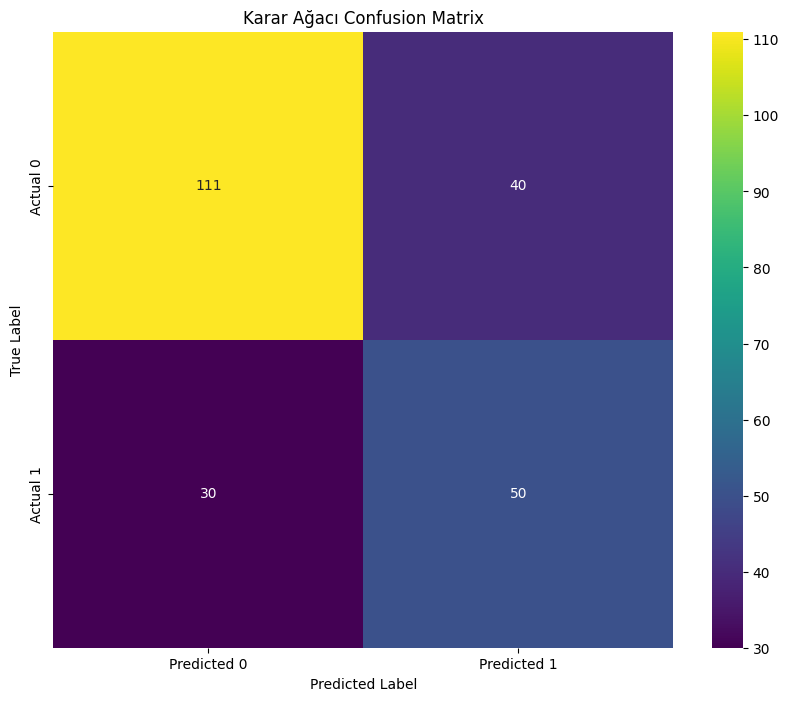

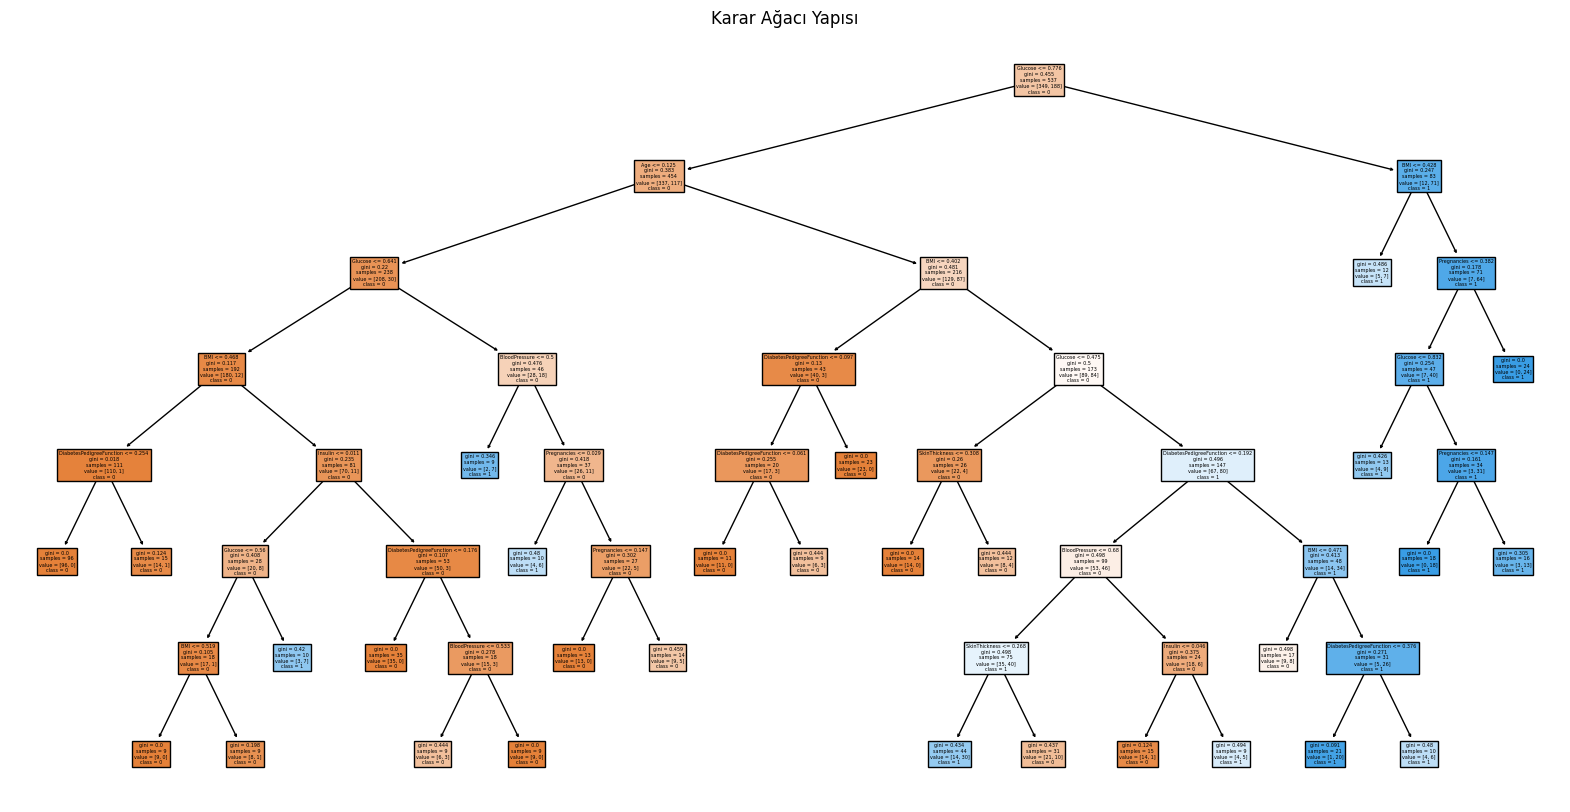

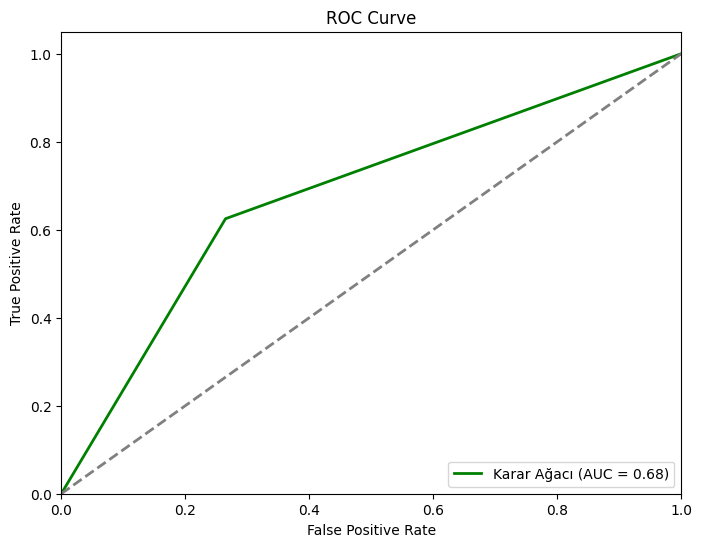

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from sklearn.metrics import classification_report

# Karar Ağacı Sınıflandırma Analizi
# max_depth ve min_samples_leaf parametrelerini ekliyoruz
decision_tree_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
f1_dt = f1_score(y_test, y_pred_decision_tree)
cm_dt = confusion_matrix(y_test, y_pred_decision_tree)

# Karar Ağacı için sensitivity, specificity ve accuracy
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
sensitivity_dt = tp_dt / (tp_dt + fn_dt)
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Confusion Matrix ve ROC curve için
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_decision_tree)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Classification report
classification_rep = classification_report(y_test, y_pred_decision_tree)

# Performans metriklerini ve classification report'u yazdırma
print("\nKarar Ağacı Sınıflandırma Performans Metrikleri:")
print(f"Doğruluk Skoru: {accuracy_dt}")
print("Sensitivity:", sensitivity_dt)
print("Specificity:", specificity_dt)
print("F1 Score:", f1_dt)
print("ROC AUC:", roc_auc_dt)
print("Confusion Matrix:")
print(cm_dt)
print("\nClassification Report:")
print(classification_rep)

# Confusion Matrix'i renkli olarak çizdirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Karar Ağacı Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Karar Ağacı yapısını çizdirme
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=data_scaled.columns, class_names=["0","1"])
plt.title("Karar Ağacı Yapısı")
plt.show()

# ROC Curve çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Karar Ağacı (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



Accuracy (Naive Bayes): 0.74
Sensitivity: 0.6625
Specificity: 0.7880794701986755

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Confusion Matrix (Naive Bayes):
[[119  32]
 [ 27  53]]


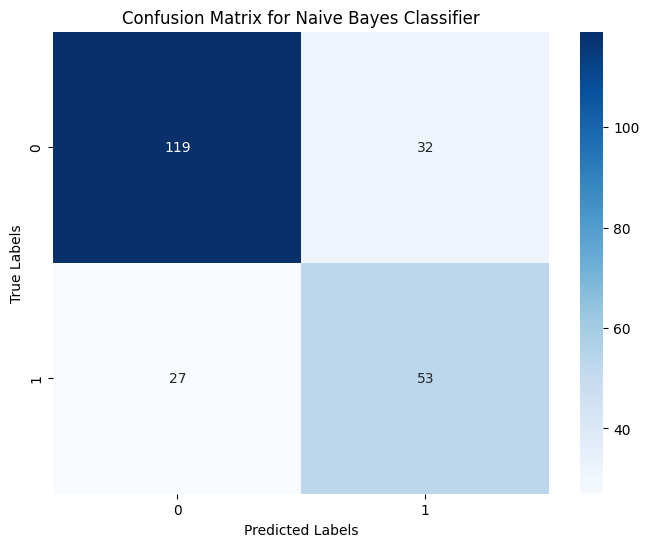

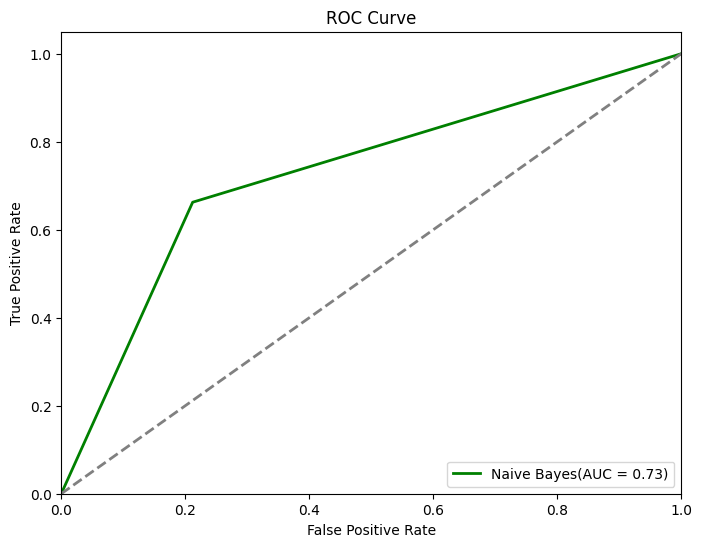

In [9]:
# Naive Bayes sınıflandırıcısından tahminler alma
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Naive Bayes için sensitivity, specificity ve accuracy
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, nb_predictions).ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Confusion Matrix ve ROC curve için
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_predictions)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini hesaplama
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini yazdırma
print(f"Accuracy (Naive Bayes): {nb_accuracy:.2f}")
print("Sensitivity:", sensitivity_nb)
print("Specificity:", specificity_nb)
print("\nClassification Report (Naive Bayes):")
print(nb_classification_report)
print("\nConfusion Matrix (Naive Bayes):")
print(nb_confusion_matrix)

# Naive Bayes sınıflandırıcısı için bir karışıklık matrisi çizme
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# ROC Curve çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes(AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
